<a href="https://colab.research.google.com/github/Salesjdsj/Data_science/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
![](https://www.dropbox.com/s/9knacmtvkui14p5/logods.png?dl=1)

[Designed by starline / Freepik](https://www.freepik.com/)

##**Churn prediction para uma empresa de telecomunicações**##


**By: [José Sales](https://www.linkedin.com/in/jos%C3%A9-sales-7aa596218/)**

[GitHub](https://github.com/Salesjdsj) | [LinkedIn](https://www.linkedin.com/in/jos%C3%A9-sales-7aa596218/) | [Medium](https://medium.com/@josesalesjdsj) 

**OBS: Para melhor visualização do projeto recomendo o visualizar dentro do ambiente do [Google Colab](https://colab.research.google.com/)**

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://www.dropbox.com/s/ehs2ynvhq1v6imx/photo-1568411561182-b07304412ca3.jpeg?dl=1" width="80%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://www.dropbox.com/s/6179zdtlswi14lm/WA_Fn-UseC_-Telco-Customer-Churn.csv?dl=0).



### Dicionário de variáveis:
 * customerID - Código de identificação do consumidor;
 * gender - Gênero do consumidor;
 * SeniorCitizen - Consumidor aposentado;
 * Partner - Cliente casado;
 * tenure - Quantos meses a pessoa é cliente da empresa;
 * PhoneService - Possui serviço telefônico;
 * MultipleLines - Possui múltiplas linhas telefônicas;
 * InternetService - Qual provedor de serviço de internet;
 * OnlineSecurity - Possui serviço de segurança online;
 * OnlineBackup - Possui serviço de backup online ativado; 
 * DeviceProtection - Cliente possui alguma proteção de sistema;
 * TechSupport - Possui serviço de suporte técnico ativado; 
 * StreamingTV - Possui streaming de TV ativado; 
 * StreamingMovies - Possui serviço de streaming de Filmes ativado;
 * Contract - Tipo do contrato do consumidor; 
 * PaperlessBilling - Cliente utiliza faturamento sem papel; 
 * PaymentMethod - Método de pagamento;
 * MonthlyCharges - Pagamento mensal atual;
 * TotalCharges - Valor total que o cliente pagou pelos serviços durante todo o tempo;
 * Churn - Cliente abandonou o serviço.

O próximo passo é importar as bibliotecas necessárias para o projeto e carregar o dataset.

In [1]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# random seed
np.random.seed(42)

In [3]:
# Configurar o notebook
sns.set_style('white')

# configurar a fonte
plt.rcParams['font.family'] = 'Arial'

# configurar as cores que usarei no plot
AZUL = "#003F5c" 
CINZA = "#9E9E9E"
CINZA_TEXTO = "#515151"
palette = sns.color_palette("coolwarm", 7)

Para facilitar a aquisição dos dados, criei um link com acesso direto ao csv. Com isso, basta importar o conjunto de dados usando o método pd.read_csv().

In [4]:
# importar os dados
DATA_PATH = "https://www.dropbox.com/s/6179zdtlswi14lm/WA_Fn-UseC_-Telco-Customer-Churn.csv?dl=1"
df = pd.read_csv(DATA_PATH)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## **Análise Exploratória**

### **Vamos analisar as 5 primeiras entradas do dataframe:**

In [ ]:
# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Q1. Quantas *features* e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nota-se que o *dataframe* é composto por 7.043 entradas e 21 features. As colunas SeniorCitizen e tenure são do tipo *int*, a colunas MonthlyCharges é do tipo *float* e as demais são do tipo *object*.

Demais pontos relevantes:

* A variável alvo está na coluna `Churn`, indicando os potenciais cancelamentos;
* A coluna `TotalCharges` deveria ser um `float`, mas está como `object`.
* Como iremos ver mais à frente, apesar de não termos detectado nenhum valor ausente, existem algumas strings que representam sim valores ausentes.
* Várias features precisam ser codificadas para valores numéricos.
* Há várias features binárias, incluindo nossa variável alvo, ou com múltiplos valores, cada um representando uma categoria.


In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Features:\t {}\n".format(df.shape[1]))

# verificar o tipo das variáveis do dataset
print("Tipos de Variáveis (por coluna)\n{}".format(df.dtypes))

# verificar o nome das features
print("\nNomes das features:\n{}\n".format(df.columns.values))

# verificar os valores únicos por coluna
print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))

Entradas:	 7043
Features:	 21

Tipos de Variáveis (por coluna)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Nomes das features:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Valor

#### **Convertendo a feature TotalCharges para float**
Quando tentamos converter as strings da coluna `TotalCharges`, acabamos identificando um erro.

O que aconteceu na verdade, foi que os supostos dados ausentes foram lançados como a string `""`. Quando tentamos `float("")`, o interpretador retorna um erro.

Assim, para conseguir converter adequadamente, criei uma função para lidar com essa exceção. Ao final, identifiquei que dados ausentes foram encontrados, e substitui pelo valor da mediana da coluna.

Abaixo, também já aproveitei e excluí a coluna `customerID`, que seria desnecessária ao longo de todo este projeto, visto que não agrega nenhuma informação, pois se trata de um identificador único para cada cliente.


In [5]:
def converter_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """

    try:
        return float(entrada)
    except ValueError:
        return np.nan

# criar cópia do dataframe
df_clean = df.copy()

# remover coluna costumerID
df_clean.drop("customerID", axis=1, inplace=True)

# converter as strings de TotalCharges para float
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_str_float)

# verificar entradas ausentes
print("Dados ausentes em 'TotalCharges' (antes):\t{}\n".format(df_clean["TotalCharges"].isnull().sum()))

# substituir os dados ausentes pelo valor da mediana
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

# verificar entradas ausentes
print("Dados ausentes em 'TotalCharges' (depois):\t{}\n".format(df_clean["TotalCharges"].isnull().sum()))

Dados ausentes em 'TotalCharges' (antes):	11

Dados ausentes em 'TotalCharges' (depois):	0



### **Q2. Qual é o resumo estatístico da feature Class?**

Vamos utilizar o método `describe`para visualizar o resumo estatístico do conjunto de dados.

Pela análise dos dados abaixo, observa-se o seguinte:
* O valor **mean** da feature `SeniorCitizen`indica que a base de clientes é composta por 16.21% de cidadãos aposentados;
* O valor **mean** da feature `tenure` indica que que o tempo médio de contrato é de 32 meses;
* O valor **mean** da feature `MonthlyCharges`indica que o valor médio de gastos mensais é de $64.76;
* A base de dados é composta de 7.043 clientes.


Apesar deste dataset ser composto majoritariamente por variáveis binárias ou categóricas, é possível ver abaixo, pelo método describe, que não há indícios da presença de outliers.

In [ ]:
# ver o resumo estatístico
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Analisando o boxplot para as colunas `MonthlyCharges` e `TotalCharges`, perceba como a distribuição dos valores reforça essa hipótese. O threshold padrão não acusou nenhum plot fora dos limites superior e inferior.

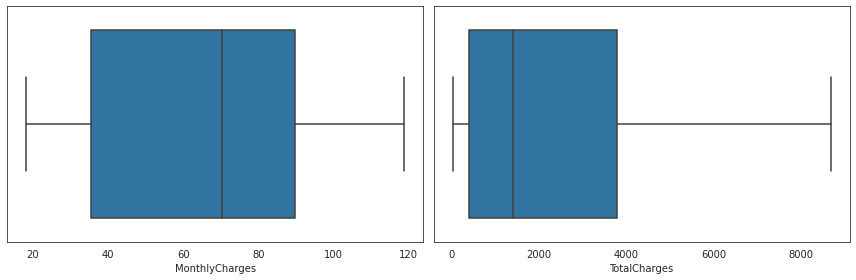

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0])
sns.boxplot(df_clean['TotalCharges'], ax=ax[1])
plt.tight_layout()

# Salvar a imagem
plt.savefig("boxplot.png", dpi = 72)

### **Q3. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataframe* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* Após análise do *dataframe* observamos a inexistência de valores ausentes, assim não se faz necessário um trabalho de limpeza.

In [ ]:
print("Dados ausentes (total):\t{}\n".format(df_clean.isnull().sum().values.sum()))
print(df_clean.isnull().sum() / df_clean.shape[0])

Dados ausentes (total):	0

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


### **Q4. Como está o balanceamento do dataset?**

Analisando o dataset, podemos notar que:
* a variável **Churn Yes** representa os cancelamentos, totalizando 1.869 clientes; e
* a variável **Churn No** representa os consumidores que possivelmente manterão o plano contratado, totalizando 5.174 clientes.

Os cancelamentos representam 26.53% do total, sendo um valor considerável em relação ao total de clientes.

No     5174
Yes    1869
Name: Churn, dtype: int64

Potenciais cancelamentos (Churn Yes) representam 26.5370% do dataset.



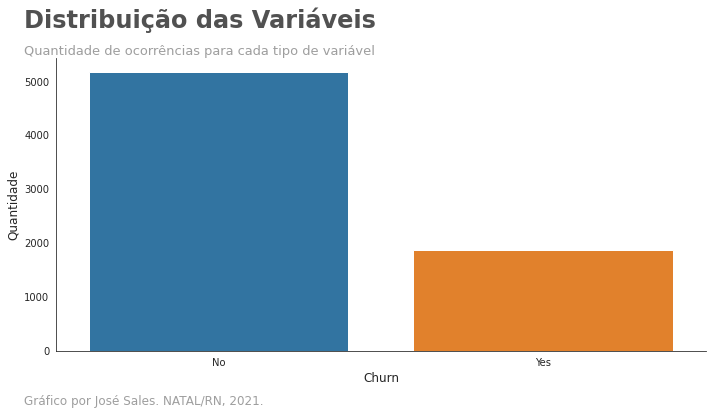

In [16]:
# Checar o balanceamento das classes
print(df_clean.Churn.value_counts())
print('\nPotenciais cancelamentos (Churn Yes) representam {:.4f}% do dataset.\n'.format((df_clean[df_clean.Churn == "Yes"].shape[0] / df_clean.shape[0]) * 100))

# Plotar gráfico de barras para a variável Churn
# Definindo a figura
fig , ax = plt.subplots(figsize=(10,6), dpi=72)

# Plot do gráfico
sns.countplot('Churn', data=df_clean,ax=ax);

# title
ax.text(-0.6, 6000,'Distribuição das Variáveis', fontsize=24, color=CINZA_TEXTO, fontweight='bold')
ax.text(-0.6, 5500,'Quantidade de ocorrências para cada tipo de variável', fontsize=13, color=CINZA)

# Nomear eixos x e y
plt.xlabel('Churn', size=12)
plt.ylabel('Quantidade', size=12)

# remover spines da direita e superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# rodapé
ax.text(
    -0.6,
    -1000,
    "Gráfico por José Sales. NATAL/RN, 2021.",
    fontsize=12, color=CINZA
    )


plt.tight_layout();

# Salvar a imagem
plt.savefig("Distribuição.png", dpi = 72)

### **Q5. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma para as variáveis `SeniorCitizen`, `tenure` e `MonthlyCharges`.

Através da análise dos gráficos, podemos notar que:

* A maioria dos clientes não são aposentados;

* A maioria dos clientes estão em início de contrato (menos de 5 meses), ou com tempo de contratação do serviço acima dos 70 meses;

* A maioria dos serviços contratados está entre 20 e 40 dólares mensais.

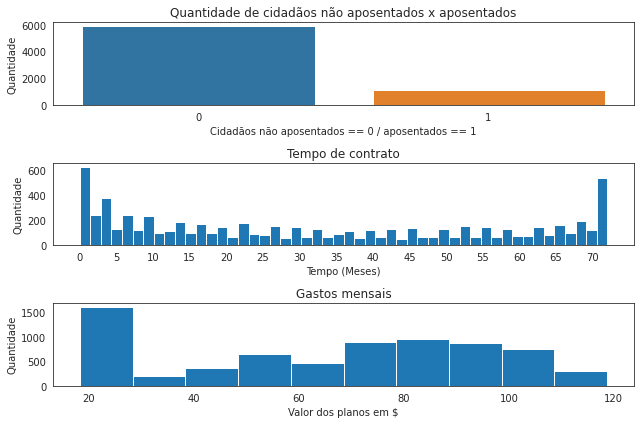

In [17]:
# Plotar gráfico 
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(9,6), dpi=72)

# Gráfico 1
sns.countplot(df_clean['SeniorCitizen'], ax=ax[0])
ax[0].set_xticks([0, 1])
ax[0].set_title('Quantidade de cidadãos não aposentados x aposentados')
ax[0].set_ylabel('Quantidade')
ax[0].set_xlabel('Cidadãos não aposentados == 0 / aposentados == 1')

# Gráfico 2
ax[1].hist(df_clean.tenure, bins = 50)
ax[1].set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
ax[1].set_title('Tempo de contrato')
ax[1].set_ylabel('Quantidade')
ax[1].set_xlabel('Tempo (Meses)')

# Gráfico 3
ax[2].hist(df_clean.MonthlyCharges)
ax[2].set_title('Gastos mensais')
ax[2].set_ylabel('Quantidade')
ax[2].set_xlabel('Valor dos planos em $')

plt.tight_layout();

# Salvar a imagem
plt.savefig("histogramas.png", dpi = 72)

### **Q6. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

* Criar uma matriz de correlação; e
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca *seaborn*.

In [ ]:
# criar uma matriz de correlação
corr = df_clean.corr()

# mostrar a matriz de correlação
display(corr)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


In [ ]:
# criando uma máscara para plotar somente uma parte da matriz
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

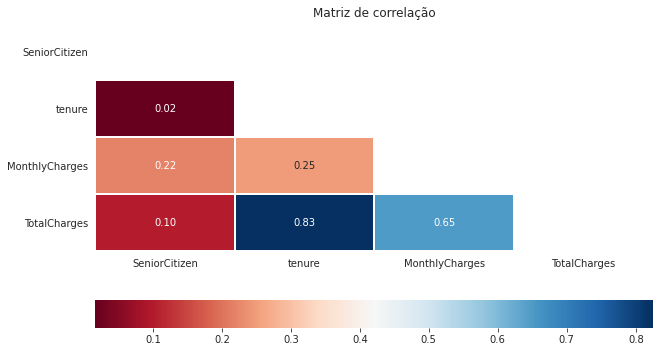

In [ ]:
# plotar um heatmap a partir das correlações
f, ax = plt.subplots(figsize=(10, 6), dpi = 72)
sns.heatmap(corr, mask=mask, cmap='RdBu', fmt='.2f', linecolor='white', annot=True, linewidths=.7, cbar_kws={"orientation": "horizontal"});

# title
plt.title('Matriz de correlação');

Uma correlação já esperada entre as features `tenure` e `TotalCharges`pode ser observada, pois quanto maior o tempo de contrato, maior é o total de cobranças pagas pelo consumidor. Ademais, não se observa outra correlação relevante para o estudo.

### **Q7. Quais são os valores de cada feature?**

Esta é uma informação importante para entender como está estruturado o *dataset*. Através da análise dos dados é possível observar o seguinte:

* A *feature* `SeniorCitizen` é binária, ou seja, tem valores 1 para "Yes" e 0 para "No";

* A *feature* `tenure` tem o valor máximo igual a 72, que indica um serviço prestado igual a 6 anos;

* As únicas *features* não categóricas são `MonthlyCharges` e `TotalCharges`.


In [6]:
features_obj = df_clean.columns

for f in features_obj:
  print(f)
  print(np.unique(df_clean[f].values))

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['No' 'Yes']
Dependents
['No' 'Yes']
tenure
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
PhoneService
['No' 'Yes']
MultipleLines
['No' 'No phone service' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'No internet service' 'Yes']
OnlineBackup
['No' 'No internet service' 'Yes']
DeviceProtection
['No' 'No internet service' 'Yes']
TechSupport
['No' 'No internet service' 'Yes']
StreamingTV
['No' 'No internet service' 'Yes']
StreamingMovies
['No' 'No internet service' 'Yes']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['No' 'Yes']
PaymentMethod
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
MonthlyCharges
[ 18.25  18.4   18.55 ... 118.6  118.65 118.75]
TotalCharges
[  18.8 

### **Q8. Qual é o tempo médio de contrato até o cancelamento?**

Através da análise do gráfico observa-se que:

* No primeiro mês de contrato ocorre a maior taxa de evasão dos clientes (20.3%); e

* A maioria dos consumidores demoram até três meses para cancelar o serviço contratado (31.9%).

In [6]:
def display_percent(plot, feature, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10, ha="center")
    plt.show()

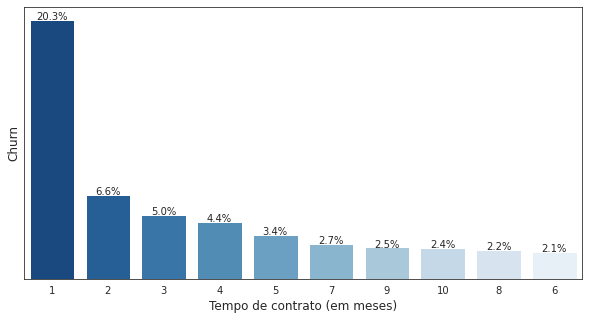

In [27]:
# Definir parâmetros
p = sns.color_palette("Blues", 10)
p.reverse()

df_top_churn = pd.DataFrame(df_clean[df_clean['Churn'] == 'Yes']['tenure'].value_counts().sort_values(ascending=False))
total_churn = df_clean[df_clean['Churn'] == 'Yes'].shape[0]

# Plot do gráfico
fig, ax = plt.subplots(figsize=(10,5), dpi=72)
sns_lifespan = sns.barplot( x = df_top_churn[:10].index, y = df_top_churn[:10].tenure, ax=ax, palette=p, order=df_top_churn[:10].index)

# Nomear eixos x e y
plt.xlabel('Tempo de contrato (em meses)', size=12)
plt.ylabel('Churn', size=12)
plt.tick_params(labelleft=False)

# Mostrar a porcentagem
display_percent(ax, df_top_churn, total_churn)

# Salvar a imagem
sns_lifespan.figure.savefig("churn_rate_tenure.png", dpi=600)

### **Q8. Qual o perfil dos clientes que cancelaram os serviços contratados?**

In [19]:
# Função auxiliar - exibir o count plot
def displayCountPlot(cat_list, df, rows=1, columns=3, figsize=(14,2.5), export=False):
  
  """
    Exibir countplot baseado nas features

    # Argumentos
      cat_list: array, lista de features
      df: DataFrame, dataset
      rows: int, número de linhas
      columns: int, número de colunas
      figsize: tamanho da figura, e.g (10, 5)

  """

  fig, ax = plt.subplots(nrows=1, ncols=4, figsize=figsize)
  
  idx = 0
  for c in cat_list:
    idx += 1
    plt.subplot(rows, columns, idx)
    ax = sns.countplot(x=df[c], data=df, palette=palette)

    plt.xticks(size=10)
    plt.xlabel('')
    plt.yticks(size=12)
    plt.ylabel('')
    plt.subplots_adjust(hspace = 0.4)
    ax.tick_params(labelleft=False)
    ax.set_title(c, alpha=0.8)

    print_rate(ax, df.shape[0])

  if export :
    save_img(fig, ax)

  plt.tight_layout()
  plt.show()

  return fig

def print_rate(ax, total):
  for p in ax.patches:
    text = '{:.1f}% ({})'.format(100 * p.get_height() / total, p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() * 0.5
    ax.annotate(text, (x, y), size = 10, ha="center", va="center")

def save_img(fig, ax):
  fig.savefig(ax.get_title(), dpi=72)

In [20]:
df_churn = df_clean[df_clean['Churn'] == 'Yes']
df_churn = df_churn.drop('Churn', axis=1)

df_churn.loc[df_churn['SeniorCitizen'] == 0,'SeniorCitizen'] = 'No' 
df_churn.loc[df_churn['SeniorCitizen'] == 1,'SeniorCitizen'] = 'Yes'

personal_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
services_attributes = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                          'StreamingMovies']
contract_attributes = ['Contract', 'PaperlessBilling', 'PaymentMethod']

#### **a) Em função de atributos pessoais:**
Através da análise dos gráficos observa-se que:

* Clientes que não possuem dependentes tem 4 vezes mais chances de cancelar um serviço em comparação a clientes que possuem dependentes;

* Consumidores solteiros são aproximadamente 2 vezes mais propensos a cancelar um serviço do que casados;

* Não aposentados são três vezes mais propensos a cancelar um serviço do que não aposentados;

* O gênero não exerce influência no cancelamento de serviços.

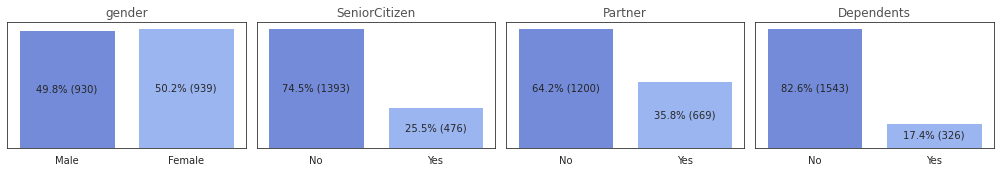

In [26]:
fig0 = displayCountPlot(personal_attributes, df_churn, rows=1, columns=4, export=True);
fig0.savefig("phone1.png", dpi=600)

#### **b) Em função dos serviços:**
Através da análise dos gráficos observa-se que:

* 90.9% dos clientes que cancelaram o serviço tinham o *Phone Service* ativo;
* 69.4% dos clientes com *Internet Service* de fibra ótica cancelaram o serviço, enquanto DSL foram 24.6% e os que não tinham internet representam 6.0%;
* A maioria dos consumidores que cancelaram o contrato com a empresa de Telecomunicações não possuíam *Online Security*, *Online Backup*, *Device Protection*, *Tech Support*, *Streming Tv* e *Streming Movie*.


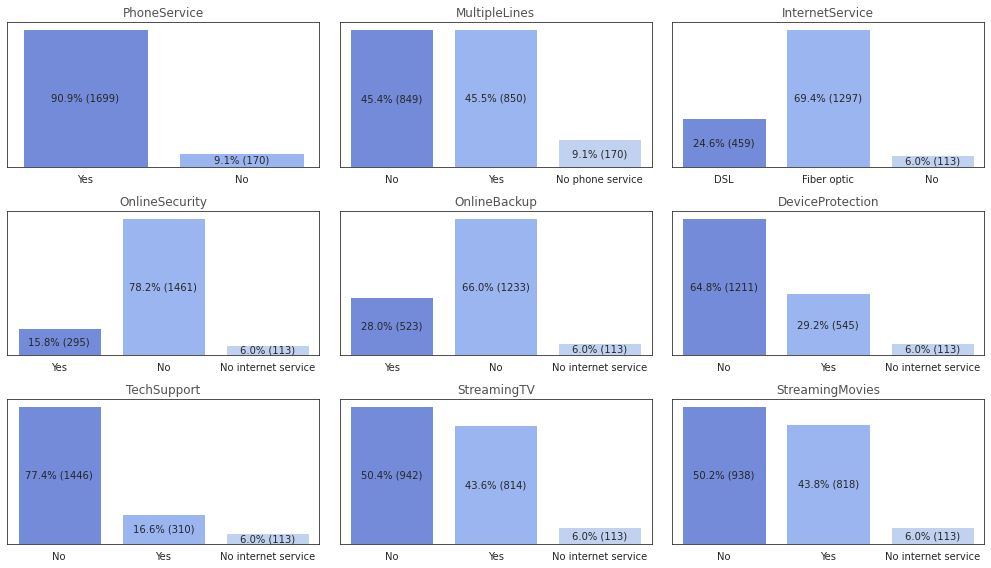

In [24]:
fig1 = displayCountPlot(services_attributes, df_churn, rows=3, columns=3, figsize=(14,8), export=True);

fig1.savefig("phone.png", dpi=600)

#### **c) Em função dos contratos:**
Através da análise do gráfico observa-se que:

* 88.6% dos consumidores que cancelam os serviços de telecomunicações possuem contrato mensal;
* 74.9% dos consumidores que cancelam os serviços de telecomunicações possuem fatura digital;
* 57.3% dos consumidores que cancelam os serviços de telecomunicações optam pelo pagamento via cheque eletrônico;

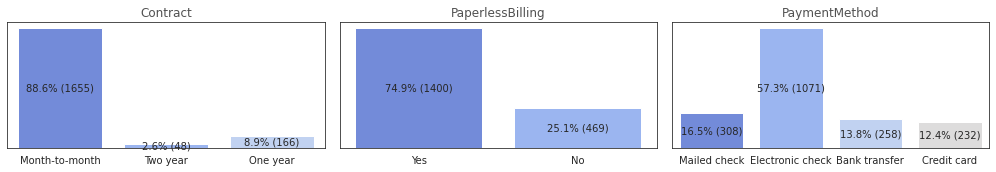

In [22]:
df_churn['PaymentMethod'] = df_churn['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '').str.strip()

fig = displayCountPlot(contract_attributes, df_churn, rows=1, columns=3)

fig.savefig("contract.png", dpi=600)

## **Preparação dos Dados**

Nesta etapa de preparação dos dados, será realizado um pré-processamento básico, apenas com a finalidade de construir um modelo base. 

As features que continham 2 labels únicos, serão processadas usando-se o `LabelEncoder`. Vale lembrar que isso inclui a variável alvo `Churn`. Na sequência, serão separadas as variáveis numéricas das categóricas. As categóricas serão transformadas em variáveis dummy, para permitir a sua utilização em todos os modelos.

In [18]:
# pré processar as variáveis
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

# criar uma cópia do dataframe
df_proc = df_clean.copy()

# Label Encoding para as variáveis Binárias
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding para colunas categóricas com múltiplas classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

# Checar o dataframe antes e após a preparação
def get_df_size(df, header='Dataset dimensions'):
  print(header,
        '\n# Features:  ', df.shape[1], 
        '\n# Variáveis: ', df.shape[0],'\n')
get_df_size(df, header='Dataset original:')
get_df_size(df_proc, header='Dataset preparado:')

# ver as 5 primeiras entradas do novo dataframe
df_proc.head()

Dataset original: 
# Features:   21 
# Variáveis:  7043 

Dataset preparado: 
# Features:   41 
# Variáveis:  7043 



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


## Modelo de Machine Learning

Com o processamento realizado na etapa anterior, os dados já podem ser usados nos modelos de machine learning.

Para podermos comparar o desempenho e melhora do modelo, criaremos um baseline simples. Não será feito nenhum ajuste nos hiperparâmetros e nem será pensado ainda em balanceamento de dados, feature engineering ou feature selection (entre outros).

No entanto, desde já é importante separar os dados que serão utilizados como treino e como teste. Os dados de teste só irão ser usados na última etapa do projeto, para termos uma avaliação mais real.

In [19]:
# separar a feature matrix da target vector
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']

# dividir os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

Irei usar a cross-validation para estimar o erro da baseline e dos modelos iniciais. Para facilitar e melhorar o código, foi criada uma função `val_model`. A métrica utilizada para avaliação será `recall`.

In [20]:
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independentes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

Para o baseline inicial, usarei o Random Forest, sem nenhum tipo de alteração nos parâmetros. Os dados que serão passados são os de treino.

In [21]:
# criar baseline e ver desempenho
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.47 (+/- 0.02)


Uma vez que temos um baseline para comparar se os ajustes melhoram ou pioram o desempenho do modelo, irei realizar o balanceamento dos dados e ver como isso irá impactar.

A técnica escolhida foi Under Sampling, após alguns teste de desempenho das outras. Seguindo recomendações de algumas literaturas, os dados serão padronizados antes de usar essa técnica de balanceamento.

Lembrando, é importante que o balanceamento aconteça apenas com os dados de treino. Os dados de teste devem permanecer intocáveis.


In [23]:
#  padronizar os  dados,
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Balancear os dados de treino
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

# Checar o tamanho do dataset após o balanceamento
get_df_size(X_train, header='Antes do balanceamento:')
get_df_size(X_train_rus, header='Após o balanceamento:')

Antes do balanceamento: 
# Features:   40 
# Variáveis:  5282 

Após o balanceamento: 
# Features:   40 
# Variáveis:  2780 



O novo conjunto está corretamente balanceado, eliminando boa parte do problema que tínhamos inicialmente. Observamos que ambas as classes (0 ou 1), possuem 1390 entradas, ou seja, houve uma redução da classe = 0 ("No").


1    1390
0    1390
dtype: int64


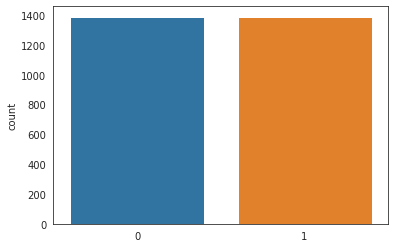

In [25]:
# ver o balanceamento das classes
print(pd.Series(y_train_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_train_rus);

Irei aplicar a validação cruzada a vários modelos, a fim de identificar o seu desempenho e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino. Os modelos escolhidos são:

* Random Forest
* Decision Tree
* Stochastic Gradient Descent
* SVC
* Regressão Logística
* LightGBM

In [ ]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []
# avaliar o desempenho (recall)
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.769784
DecisionTreeClassifier,0.681295
SGDClassifier,0.733813
SVC,0.790647
LogisticRegression,0.807194
XGBClassifier,0.805036
LGBMClassifier,0.766187


Dadas as características do problema e o desempenho durante as execuções anteriores, optei pelo XGBoost, praticamente empatado com a Regressão Logística.

Meu entendimento é que o tuning dos parâmetros pode melhorar ainda mais a qualidade da solução. Como temos poucos ajustes possíveis na Regressão Logística, não acredito que o resultado poderia passar o XGBoost.

## Otimização dos Hiperparâmetros

XGBoost possui inúmeros parâmetros. Alguns afetam mais a qualidade do modelo, outros menos. Uma boa prática é definir uma taxa de aprendizado e número de estimadores, realizar tuning de outros parâmetros e, no final, checar outras taxas de aprendizado.

Abaixo, irei ajustar o número de estimadores. O modelo foi instanciado com a `learning_rate=0.1`.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1)

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8107913669064748 para {'n_estimators': 50}


Com o número de estimadores igual a 50, realizarei a busca pelos parâmetros `max_depth` e `min_child_weight`.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8237410071942446 para {'max_depth': 1, 'min_child_weight': 1}


Obtidos os valores de `max_depth=1` e `min_child_weight=1`, irei otimizar o parâmetro `gamma`.

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8187050359712231 para {'gamma': 0.0}


Por fim, obtido `gamma=0`, vou testar quatro valores para a `learning_rate` e ver qual oferece o melhor resultado.

In [ ]:
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8812949640287769 para {'learning_rate': 0.001}


Fato é que uma taxa de aprendizado menor, conseguiu melhorar o desempenho do modelo XGBoost, considerando `recall` como sendo a única métrica de importância (premissa assumida por este autor).

Agora, treina-se o modelo em cima do dataset de treino completo, e verifica-se o desempenho final em cima dos dados de teste, no seu primeiro contato com esse sub-conjunto que havia sido preservado.

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1282
           1       0.44      0.90      0.59       479

    accuracy                           0.66      1761
   macro avg       0.69      0.73      0.65      1761
weighted avg       0.80      0.66      0.68      1761

AUC: 0.7336



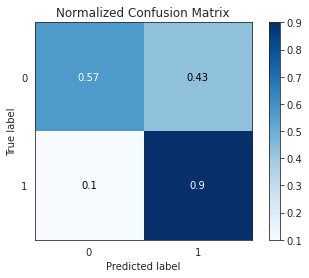

In [ ]:
# modelo final
xgb = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)
xgb.fit(X_train_rus, y_train_rus)

# fazer a previsão
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

## Conclusões

Os dados de testes não haviam sido passados para o modelo ainda. No entanto, ele manteve um desempenho próximo àquele estimado anteriormente, graças a um bom trabalho de otimização nos parâmetros.

Ainda há espaço para se tentar outras técnicas de balanceamento de dados e também técnicas de machine learning como feature engineering e feature selection.

Por fim, através desta análise é possível traçar o perfil dos consumidores satisfeitos com os serviços prestados e aumentar a retenção dos clientes, visto que este custo é mais baixo do que o de aquisição de novos usuários.

